In [1]:
from PLAbDab import PLAbDab
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_directory = "/vols/bitbucket/kenyon/PLAbDab_data_improved"  # Things are slower on the shared storage

plabdab = PLAbDab(data_directory, n_jobs = 10) # more than 10 jobs is meh

In [3]:
df = plabdab.paired_sequences
pairing_methods = list(df.pairing.unique())

# Database statistics

In [4]:
len(df), len(plabdab.paired_sequences.drop_duplicates(["heavy_sequence","light_sequence"]))

(154524, 69630)

In [5]:
years = [int(x[-4:]) for x in df.update_date]
years = np.array([year for year in years if year > 2000])

/tmp/ipykernel_241024/835500348.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


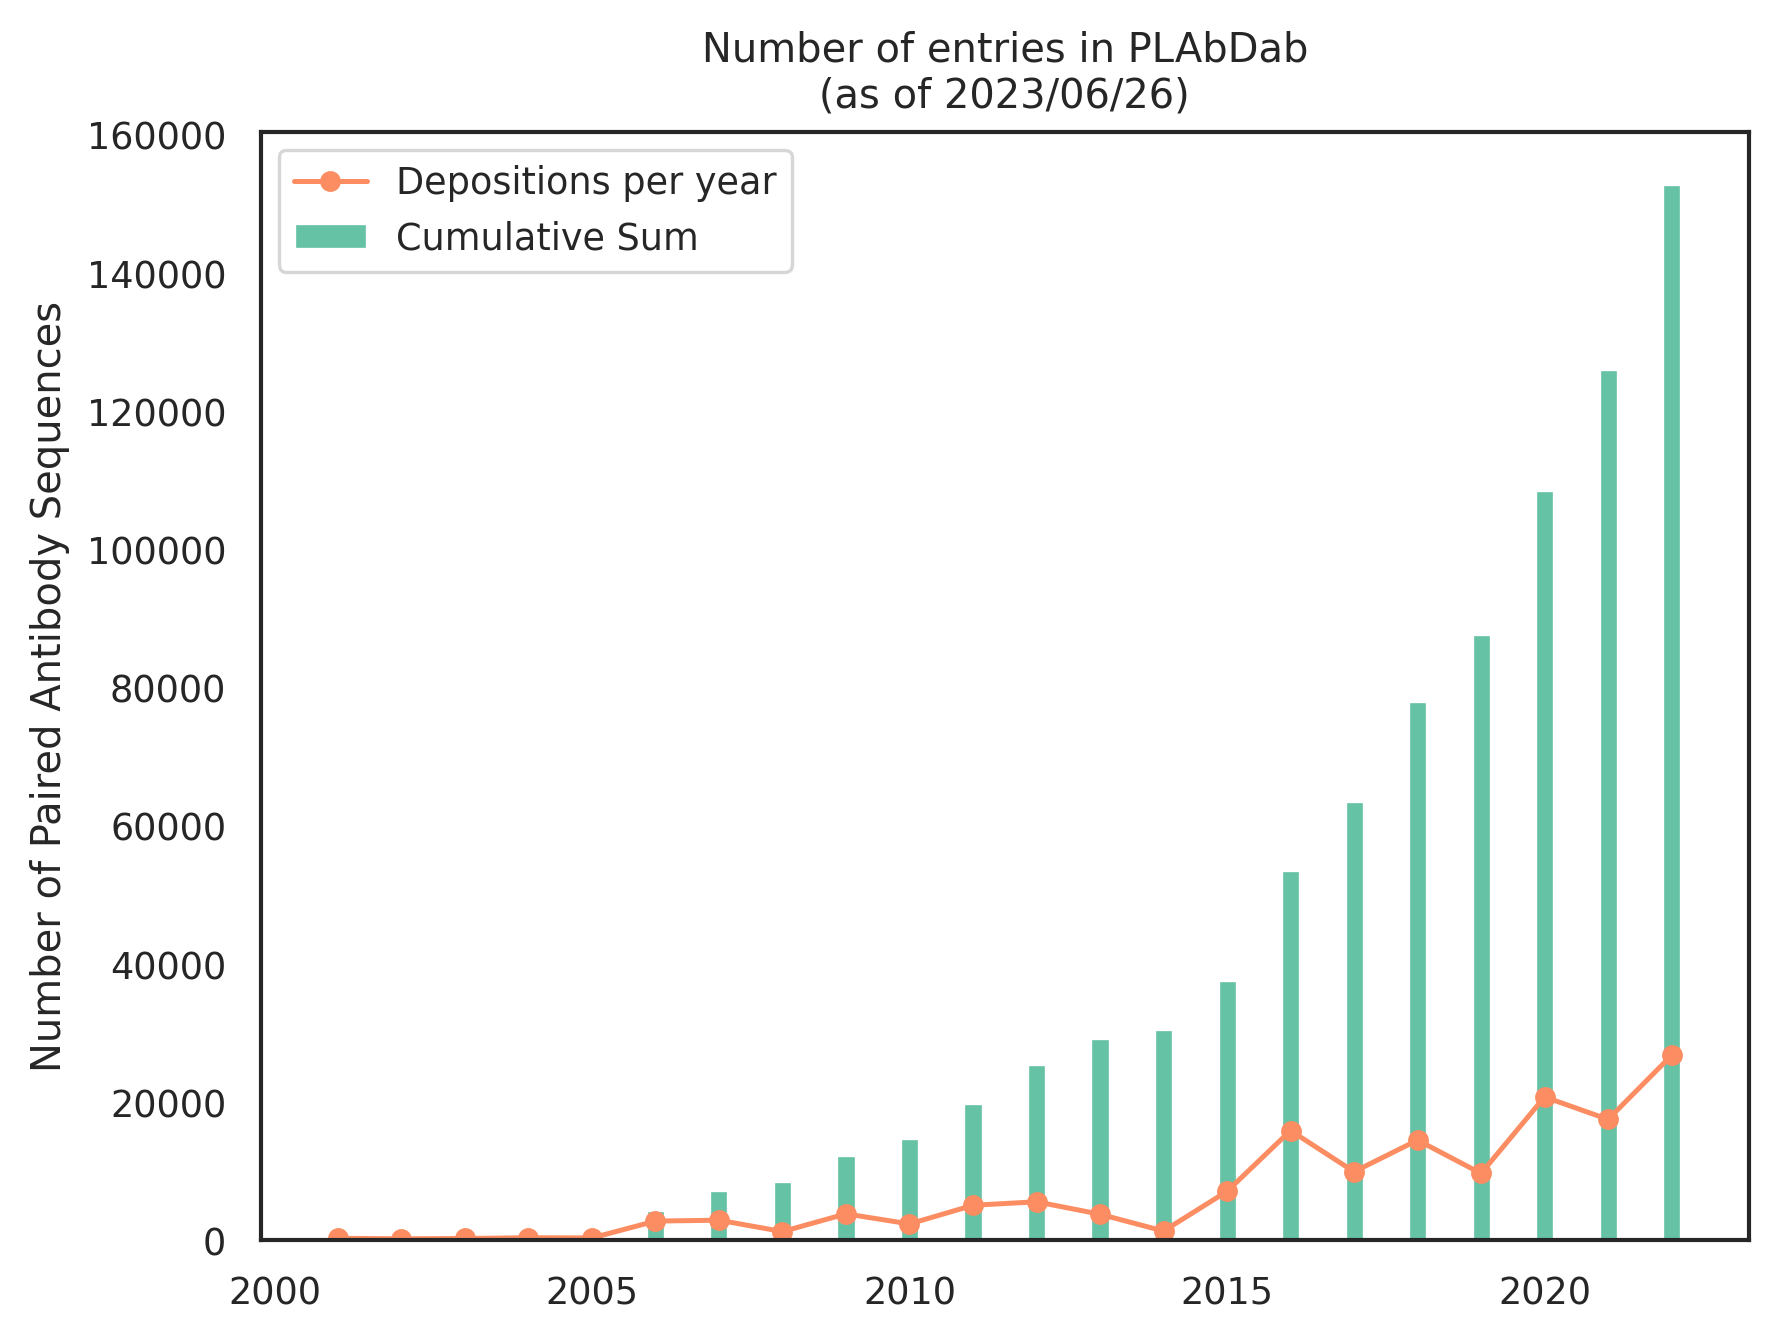

In [6]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1)

plt.style.use('seaborn-deep')

plt.figure(dpi=300)
# evaluate the histogram
values, base = np.histogram(years, bins=years.max() - years.min())
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.bar(base[:-1], cumulative, width=0.3, color = sns.color_palette("Set2")[0])
# plot the survival function
plt.plot(base[:-1], values, 'o-', ms=4, color = sns.color_palette("Set2")[1])

plt.ylabel('Number of Paired Antibody Sequences')
plt.title(f'Number of entries in PLAbDab\n(as of {plabdab.config["last_update"]})')

plt.legend(("Depositions per year", "Cumulative Sum"), loc='best')
#plt.legend(("                  ", "                 "), loc='best')

yticks = plt.yticks()

#plt.savefig("/homes/kenyon/Pictures/PLAbDab_per_year.svg", bbox_inches='tight', transparent=True)


In [7]:
sizes = {x: len(df[df.pairing == x]) for x in pairing_methods}

for size in sizes:
    print(f"{size}: {sizes[size]}")

Same entry: 31716
Unique word: 1246
Unique source: 19879
Unique chain: 3901
Patent text: 78181
Ordered entries: 7589
Xtal structure: 11030
TheraSAbDab: 982


In [8]:
len(df.drop_duplicates(["heavy_sequence","light_sequence"]))

69630

In [9]:
df = plabdab.paired_sequences.copy()

In [10]:
def source(entry):
    if entry.pairing == "TheraSAbDab":
        return "Therapeutic Antibodies"
    elif entry.pairing == "Xtal structure":
        return "Crystal Structures"
    elif "patent" in entry.heavy_definition:
        return "Patented Antibodies"
    else:
        return "Scientific Literature"

# Patents don't report species information. That is why there are so many unknowns!!!

In [11]:
df["source"] = df.apply(source, axis=1)

In [12]:
df[df.source=="Patented Antibodies"].organism.unique()

array(['Unknown.'], dtype=object)

/tmp/ipykernel_241024/1884116222.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


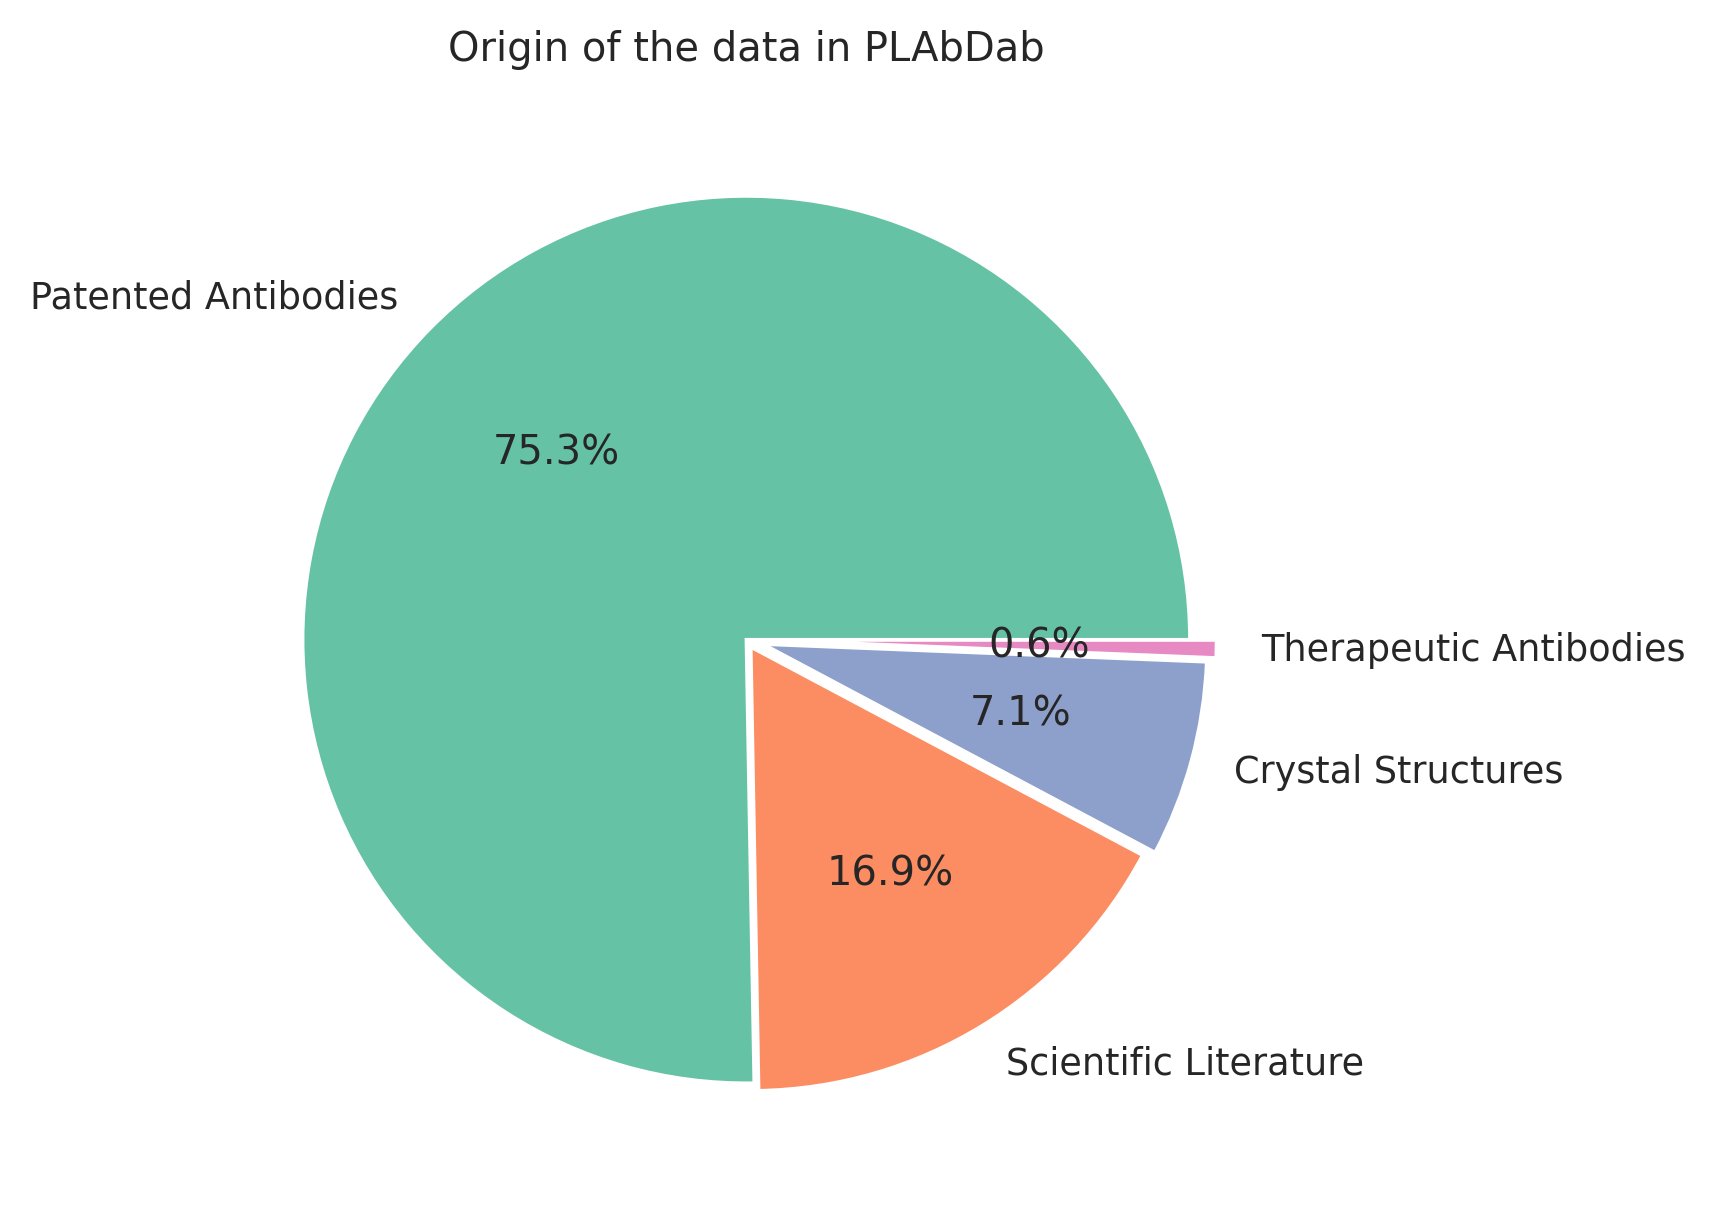

In [13]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')

sns.set_style('white')
sns.set_context("paper", font_scale = 1)

plt.figure(dpi=300)
df.source.value_counts().plot.pie(ylabel = "", title = "Origin of the data in PLAbDab", autopct='%1.1f%%', explode=(0, 0.02, 0.04, 0.06), startangle=0, colors=sns.color_palette("Set2"))

plt.savefig("/homes/kenyon/Pictures/source.svg", bbox_inches='tight', transparent=True)

In [14]:
def get_species(entry):
    organism = entry.organism.upper()
    
    if "HOMO" in organism:
        return "Homo sapiens"
    elif "HUMAN" in organism:
        return "Homo sapiens"
    elif 'SEVERE ACUTE RESPIRATORY SYNDROME CORONAVIRUS 2' == organism:
        return "Homo sapiens"
    elif "CONSTRUCT" in organism:
        return "Synthetic construct"
    elif "MUS MUSCULUS" in organism:
        return "Mus musculus"
    elif "MACACA MULATTA" in organism:
        return "Macaca mulatta"
    elif entry.organism in most:
        return entry.organism
    else:
        return "Other" 
    

/tmp/ipykernel_241024/2162952752.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


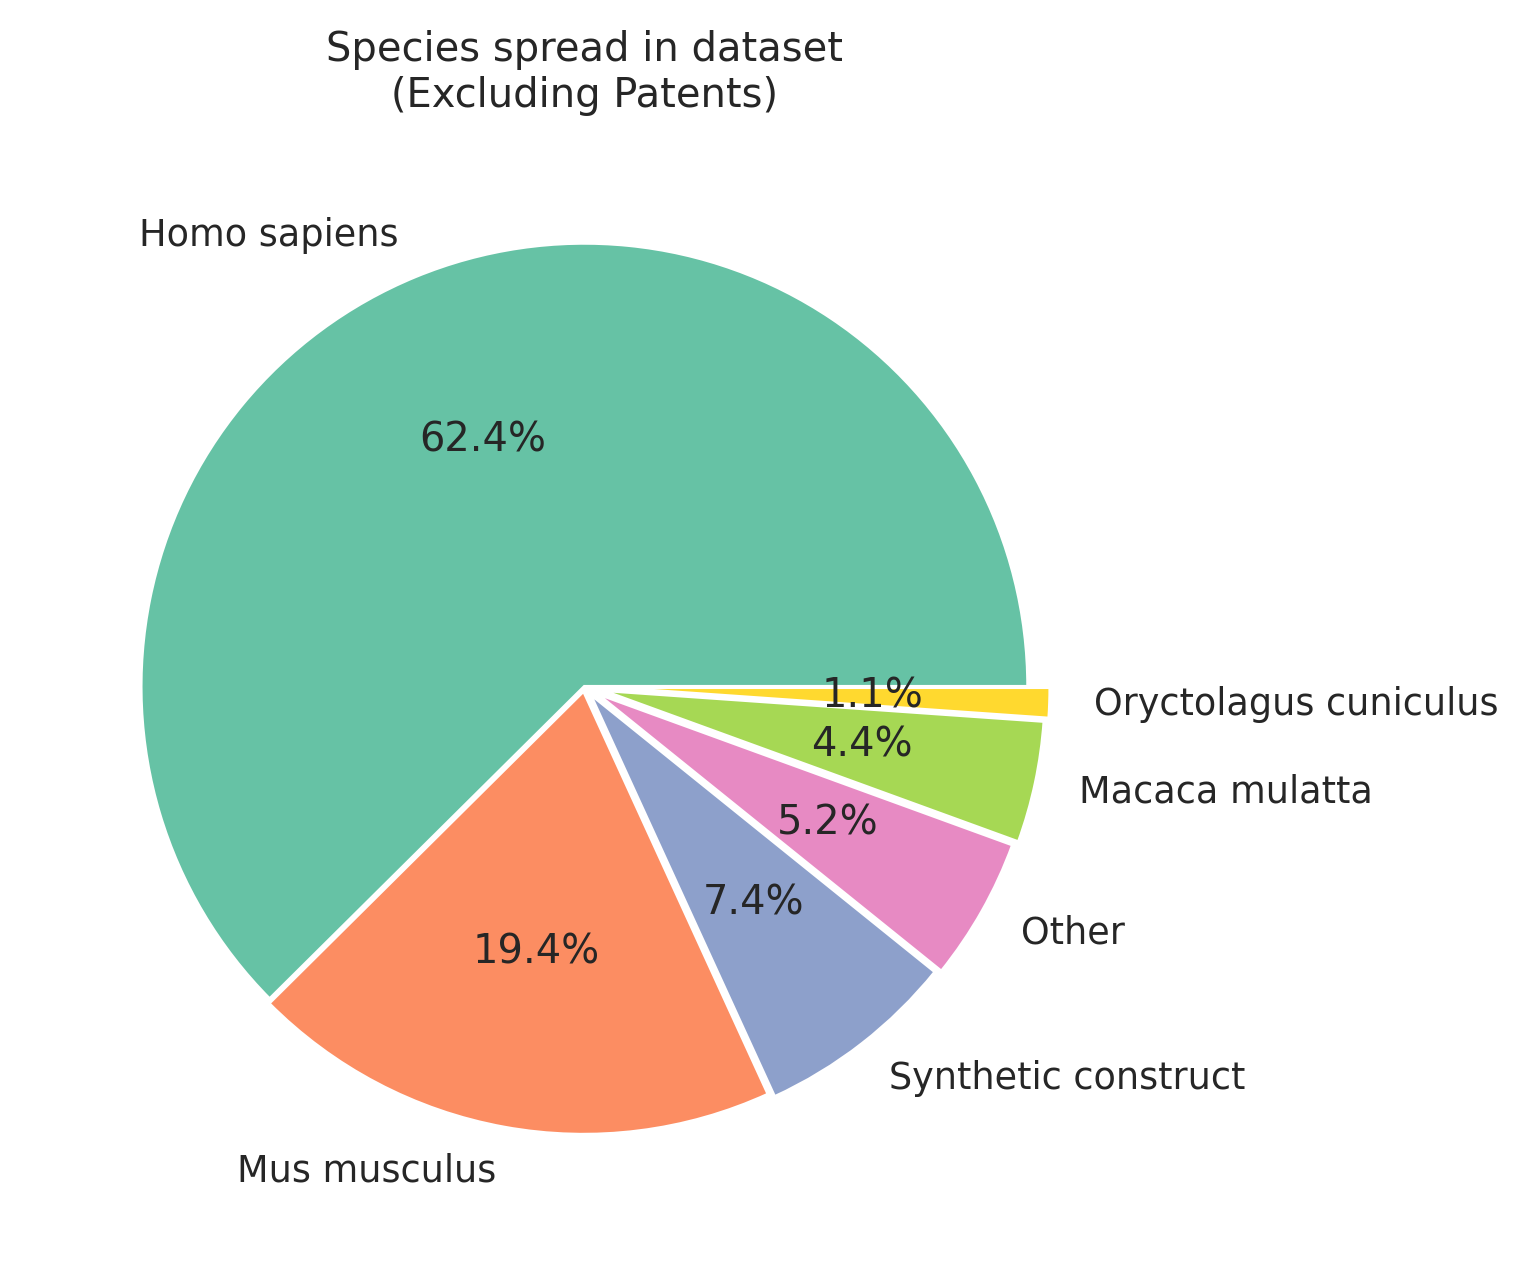

In [15]:
plt.style.use('seaborn-deep')
plt.figure(dpi=300)

sns.set_style('white')
sns.set_context("paper", font_scale = 1)

df2 = df[df.organism != "Unknown."].copy()

counts = df2.organism.value_counts()
most = counts[[x > 200 for x in counts]]
df2["pie_organ"] = df2.apply(get_species, axis=1)

df2.pie_organ.value_counts().plot.pie(ylabel = "", title = "Species spread in dataset\n(Excluding Patents)",autopct='%1.1f%%', explode=(0, 0.01, 0.02, 0.03, 0.04, 0.05), startangle=0, colors=sns.color_palette("Set2"))

plt.savefig("/homes/kenyon/Pictures/species_known.svg", bbox_inches='tight', transparent=True)

In [16]:
df2[df2.pie_organ == "Other"].organism.unique()

array(['unidentified cloning vector', 'Mus sp.',
       'rpL23-fusion expression vector pScFV', 'Phagemid vector pGALD7',
       'Phagemid vector pGALD7DL', 'Phagemid vector pGALD9',
       'Phagemid vector pGALD9DL', 'Phagemid vector pComb3X-KD247scFv-VI',
       'Cloning vector pNB102', 'Synthetic plasmid pUC57(Kan)-HDR-HEL23',
       'Vector TPMV_P-EGFP_HaEGFR', 'Vector TPMV_P-EGFP_HaCD20',
       'Synthetic plasmid pRK122', 'Synthetic plasmid pRK123',
       'Mammalian expression vector pEXPR5',
       'Mammalian expression vector pEXPR39',
       'Mammalian expression vector pEXPR62',
       'Mammalian expression vector pEXPR50',
       'Mammalian expression vector pEXPR61',
       'Mammalian expression vector pEXPR51',
       'Mammalian expression vector pEXPR53',
       'Expression vector pNZ8148#2:CYT-GFP-PDL1scFv',
       'Expression vector pNZ8148#2:CYT-CC12.1scFv', 'unidentified',
       'Expression vector pSTE2-215(Yol)', 'Drosophila melanogaster',
       'Escherichia coli'

In [18]:
import pandas as pd
df3 = pd.read_csv("paired_cdr3_length.csv")

In [19]:
df["H3s"] = [int(x.split("_")[-1]) if x!='None' else 0 for x in df.cdr_lengths]

gb_data = df[df.pairing.isin(pairing_methods[:-2])].drop_duplicates(["heavy_sequence","light_sequence"]).copy()
sab_data = df[df.pairing == pairing_methods[-2]].drop_duplicates(["heavy_sequence","light_sequence"]).copy()
tsd_data = df[df.pairing == pairing_methods[-1]].drop_duplicates(["heavy_sequence","light_sequence"]).copy()

/tmp/ipykernel_241024/3758245380.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 1.0, 'L3 lengths distribution for antibodies in different datasets')

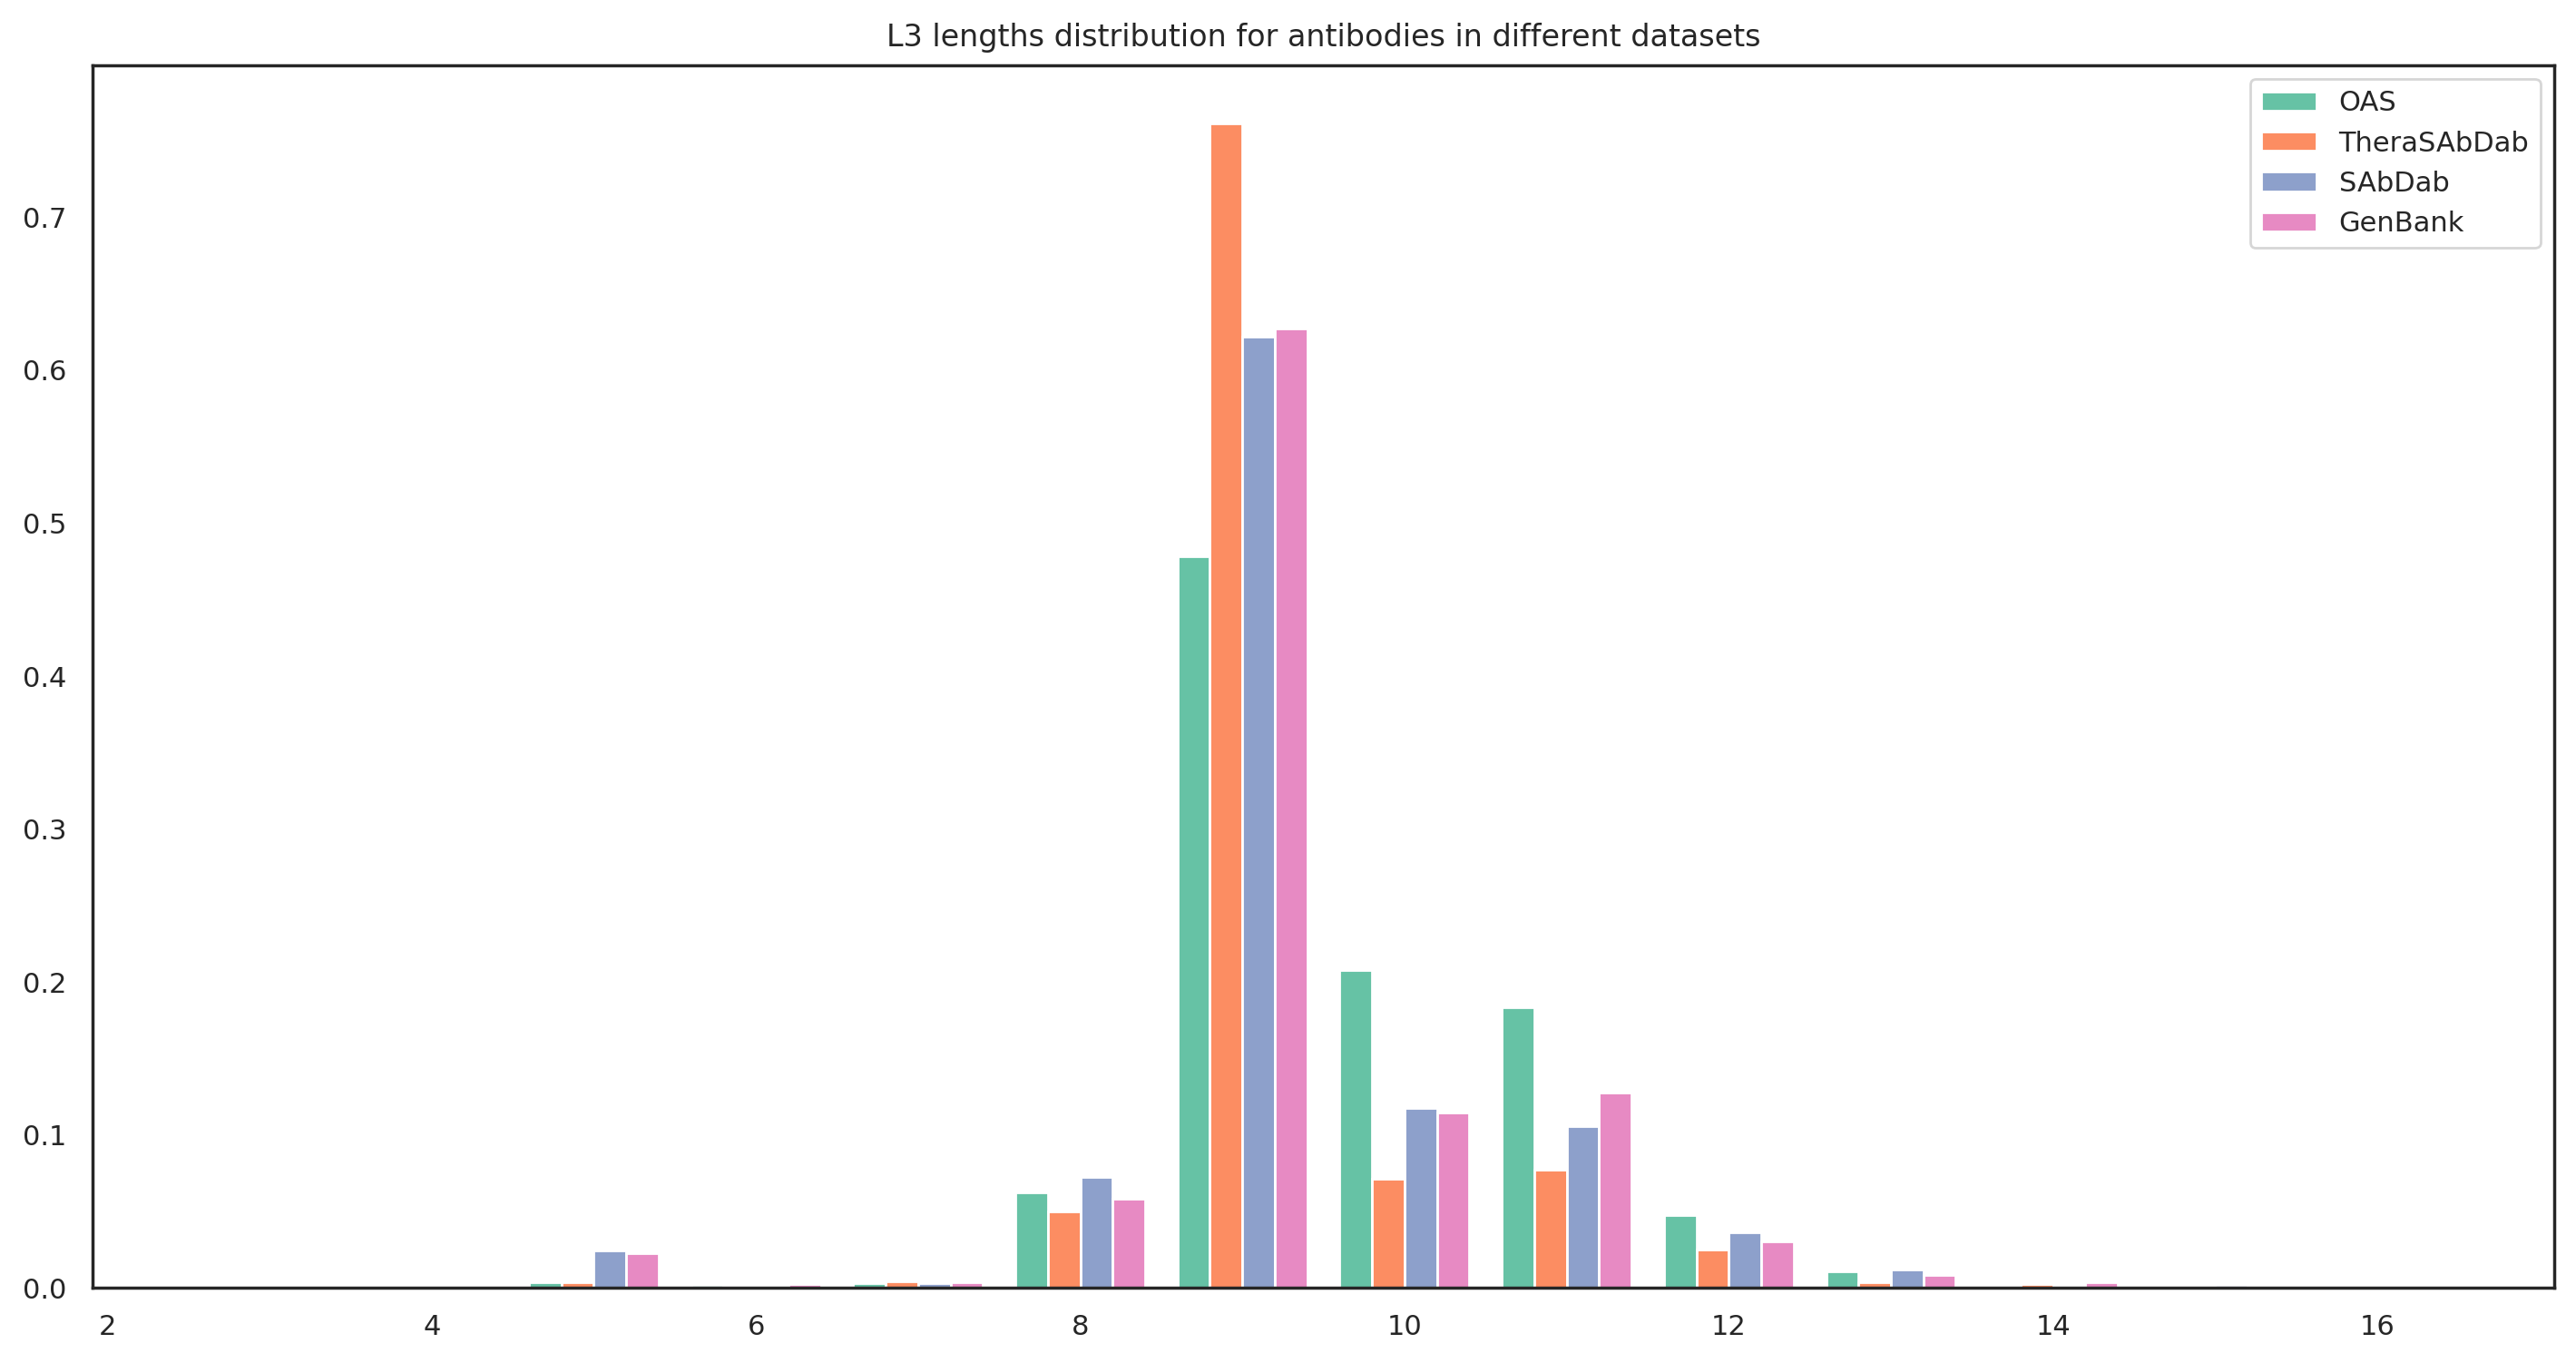

In [20]:
plt.style.use('seaborn-deep')

plt.figure(figsize=(14,7), dpi=250)
#sab_data['H3s'].value_counts().sort_index().plot.bar()
oas_counts = df3[(2 <df3.l3_len) & (df3.l3_len < 17)]["l3_len"].value_counts(normalize = True).sort_index()
sab_counts = sab_data[(2 <sab_data.H3s) & (sab_data.H3s < 17)]['H3s'].value_counts(normalize = True).sort_index()
gb_counts = gb_data[(2 <gb_data.H3s) & (gb_data.H3s < 17)]['H3s'].value_counts(normalize = True).sort_index()
tsd_counts = tsd_data[(2 <tsd_data.H3s) & (tsd_data.H3s < 17)]['H3s'].value_counts(normalize = True).sort_index()


plt.bar(oas_counts.index-0.3, oas_counts.values, 0.2, label = "OAS", color = sns.color_palette("Set2")[0])
plt.bar(tsd_counts.index-0.1, tsd_counts.values, 0.2, label = "TheraSAbDab", color = sns.color_palette("Set2")[1])
plt.bar(sab_counts.index+0.1, sab_counts.values, 0.2, label = "SAbDab", color = sns.color_palette("Set2")[2])
plt.bar(gb_counts.index+0.3, gb_counts.values,  0.2, label = "GenBank", color = sns.color_palette("Set2")[3])

plt.legend()

plt.title("L3 lengths distribution for antibodies in different datasets")

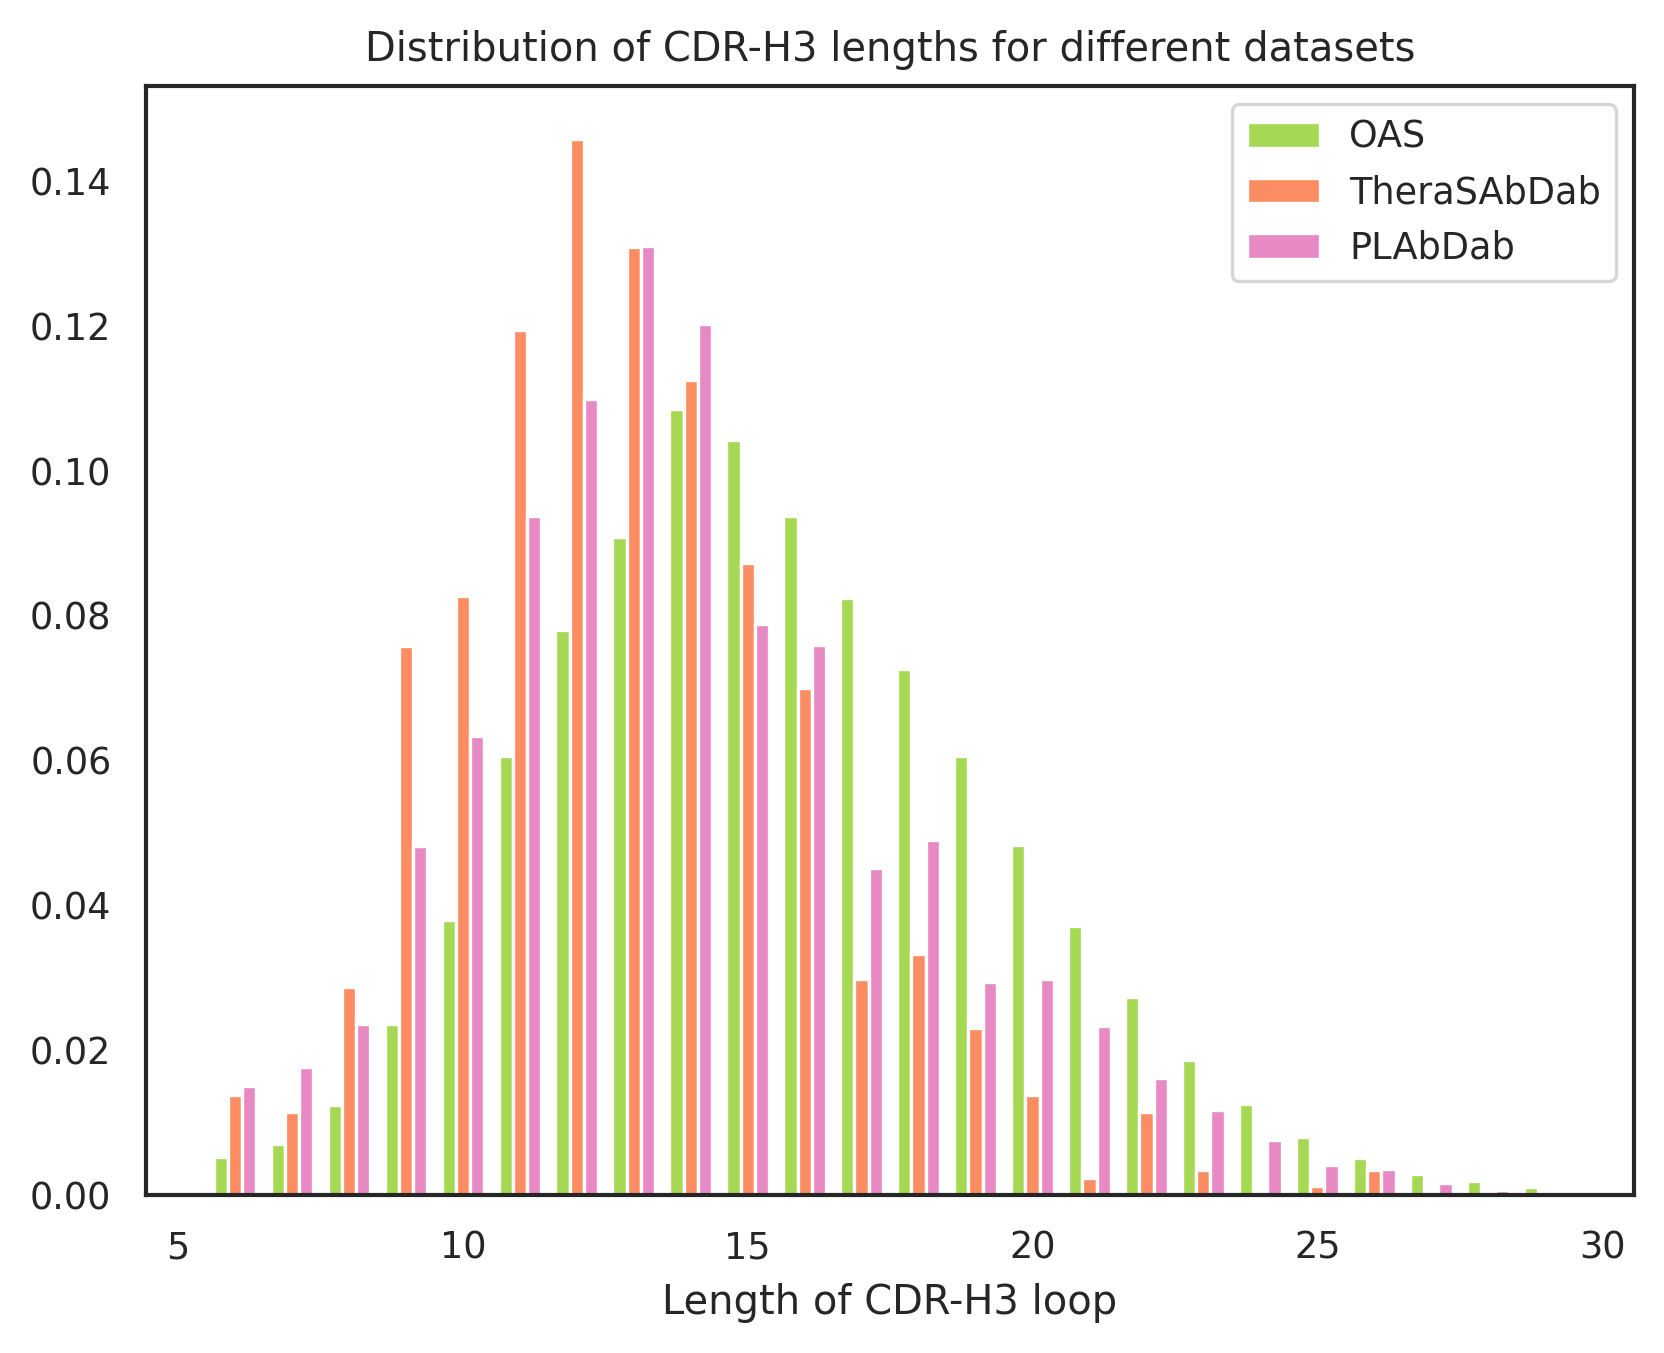

In [21]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1)

df["H3s"] = [int(x.split("_")[2]) if x!='None' else 0 for x in df.cdr_lengths]

gb_data = df.drop_duplicates(["heavy_sequence","light_sequence"]).copy()
sab_data = df[df.pairing == "Xtal structure"].drop_duplicates(["heavy_sequence","light_sequence"]).copy()
tsd_data = df[df.pairing == "TheraSAbDab"].drop_duplicates(["heavy_sequence","light_sequence"]).copy()

plt.figure( dpi=300)
#sab_data['H3s'].value_counts().sort_index().plot.bar()
oas_counts = df3[(5 <df3.h3_len) & (df3.h3_len < 30)]["h3_len"].value_counts(normalize = True).sort_index()
sab_counts = sab_data[(5 <sab_data.H3s) & (sab_data.H3s < 30)]['H3s'].value_counts(normalize = True).sort_index()
gb_counts = gb_data[(5 <gb_data.H3s) & (gb_data.H3s < 30)]['H3s'].value_counts(normalize = True).sort_index()
tsd_counts = tsd_data[(5 <tsd_data.H3s) & (tsd_data.H3s < 30)]['H3s'].value_counts(normalize = True).sort_index()


plt.bar(oas_counts.index-0.25, oas_counts.values, 0.25, label = "OAS",color = sns.color_palette("Set2")[4])
plt.bar(tsd_counts.index-0.0, tsd_counts.values, 0.25, label = "TheraSAbDab", color = sns.color_palette("Set2")[1])
#plt.bar(sab_counts.index+0.1, sab_counts.values, 0.2, label = "SAbDab", color = sns.color_palette("Set2")[2])
plt.bar(gb_counts.index+0.25, gb_counts.values,  0.25, label = "PLAbDab", color = sns.color_palette("Set2")[3])

plt.legend()
plt.xlabel("Length of CDR-H3 loop")

plt.title("Distribution of CDR-H3 lengths for different datasets")
plt.savefig("/homes/kenyon/Pictures/cdr_lengths.svg", bbox_inches='tight', transparent=True)

In [22]:
df3.h3_len.mean(), tsd_data.H3s.mean(), gb_data.H3s.mean()

(15.557697566658993, 12.904545454545454, 14.04251041217866)

# **Search PLAbDab by structure**

In [23]:
query = {
    "H":'VKLLEQSGAEVKKPGASVKVSCKASGYSFTSYGLHWVRQAPGQRLEWMGWISAGTGNTKYSQKFRGRVTFTRDTSATTAYMGLSSLRPEDTAVYYCARDPYGGGKSEFDYWGQGTLVTVSS',
    "L":'ELVMTQSPSSLSASVGDRVNIACRASQGISSALAWYQQKPGKAPRLLIYDASNLESGVPSRFSGSGSGTDFTLTISSLQPEDFAIYYCQQFNSYPLTFGGGTKVEIKRTV'
}

In [24]:
best_struc = plabdab.structure_search(query)
best_struc.drop_duplicates(["model"]).head(20)

KeyboardInterrupt: 

# **Search PLAbDab by sequence**

In [ ]:
best_ident = plabdab.sequence_search({"H":query["H"]}, keep_best_n = 20, sort_by = 'average', regions=['whole'])
best_ident

,chain,numbered,cdr_lengths,GBSeq_locus,GBSeq_division,GBSeq_update-date,GBSeq_create-date,GBSeq_definition,GBSeq_accession-version,GBSeq_other-seqids,...,GBSeq_sequence,GBSeq_project,GBReference_authors,GBReference_title,isolate,clone,sequence,Species,Chain,Identity
0,H,VKLLEQSGA-EVKKPGASVKVSCKASGYSF----TSYGLHWVRQAP...,7_8_14,AMF01527,PAT,10-FEB-2016,10-FEB-2016,Sequence 52 from patent US 9045540,AMF01527.1,"['gb|AMF01527.1|', 'pat|US|9045540|52', 'gi|98...",...,qvklleqsgaevkkpgasvkvsckasgysftsyglhwvrqapgqrl...,None,"Jandrot-Perrus,M.; Billiald,P.; Muzard,J.",Anti-glycoprotein VI scFv fragment for treatme...,None,None,VKLLEQSGAEVKKPGASVKVSCKASGYSFTSYGLHWVRQAPGQRLE...,Any,Both,1.000000
1,H,VKLLEQSGA-EVKKPGASVKVSCKASGYSF----TSYGLHWVRQAP...,7_8_14,AMF01405,PAT,10-FEB-2016,10-FEB-2016,Sequence 52 from patent US 9045538,AMF01405.1,"['gb|AMF01405.1|', 'pat|US|9045538|52', 'gi|98...",...,qvklleqsgaevkkpgasvkvsckasgysftsyglhwvrqapgqrl...,None,"Jandrot-Perrus,M.; Billiald,P.; Muzard,J.",Anti-glycoprotein VI scFv fragment for treatme...,None,None,VKLLEQSGAEVKKPGASVKVSCKASGYSFTSYGLHWVRQAPGQRLE...,Any,Both,1.000000
2,H,VKLLEQSGA-EVKKPGASVKVSCKASGYSF----TSYGLHWVRQAP...,7_8_14,AAA02614,PRI,26-JUL-2016,27-APR-1993,"immunoglobulin heavy chain, partial [Homo sapi...",AAA02614.2,"['gb|AAA02614.2|', 'gi|12656963']",...,qvklleqsgaevkkpgasvkvsckasgysftsyglhwvrqapgqrl...,None,"Chazenbalk,G.D.; Portolano,S.; Russo,D.; Hutch...",Human organ-specific autoimmune disease. Molec...,None,None,VKLLEQSGAEVKKPGASVKVSCKASGYSFTSYGLHWVRQAPGQRLE...,Any,Both,0.966942
3,H,---LEQSGA-EVKKPGASVKVSCKASGYTF----TSYAMHWVRQAP...,7_8_14,ATW68707,PRI,01-NOV-2018,01-NOV-2018,"immunoglobulin heavy chain variable region, pa...",ATW68707.1,"['gb|ATW68707.1|', 'gi|1278988744']",...,leqsgaevkkpgasvkvsckasgytftsyamhwvrqapgqrlewmg...,None,"Chen,Z.; Farci,P.",Comprehensive Molecular Characterization of He...,None,31MH_F9,LEQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLEWMG...,Any,Both,0.842975
4,H,---LEQSGA-EVKKPGASVKVSCKASGYTF----TSYAMHWVRQAP...,7_8_14,ATW68706,PRI,01-NOV-2018,01-NOV-2018,"immunoglobulin heavy chain variable region, pa...",ATW68706.1,"['gb|ATW68706.1|', 'gi|1278988742']",...,leqsgaevkkpgasvkvsckasgytftsyamhwvrqapgqrlewmg...,None,"Chen,Z.; Farci,P.",Comprehensive Molecular Characterization of He...,None,31MH_D6,LEQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLEWMG...,Any,Both,0.842975
5,H,QVQLVQSGA-EVKKPGASVKVSCKASGYTF----TSYAMHWVRQAP...,7_8_13,ABF83408,PRI,14-JUL-2016,10-JUN-2006,circulating B cell antibody heavy chain variab...,ABF83408.1,"['gb|ABF83408.1|', 'gi|106899064']",...,maqvqlvqsgaevkkpgasvkvsckasgytftsyamhwvrqapgqr...,None,"Tian,C.; Luskin,G.K.; Dischert,K.M.; Higginbot...",Evidence for preferential Ig gene usage and di...,None,HF2-95,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...,Any,Both,0.826446
6,H,QVQLVQSGA-EVKKPGASVKVSCKASGYTF----TSYAMHWVRQAP...,7_8_14,QPY07296,PAT,15-DEC-2020,15-DEC-2020,Sequence 1494 from patent US 10774138,QPY07296.1,"['gb|QPY07296.1|', 'pat|US|10774138|1494', 'gi...",...,qvqlvqsgaevkkpgasvkvsckasgytftsyamhwvrqapgqrle...,None,"Smider,V.; Graziano,J.; Mao,H.H.; Song,B.D.; C...",Combinatorial antibody libraries and uses thereof,None,None,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...,Any,Both,0.818182
7,H,QVQLVQSGA-EVKKPGASVKVSCKASGYTF----TSYAMHWVRQAP...,7_8_14,AQN43174,PAT,12-FEB-2017,12-FEB-2017,Sequence 138 from patent US 9403904,AQN43174.1,"['gb|AQN43174.1|', 'pat|US|9403904|138', 'gi|1...",...,qvqlvqsgaevkkpgasvkvsckasgytftsyamhwvrqapgqrle...,None,"Smider,V.; Mao,H.H.; Bentley,C.; Chase,T.",Anti-DLL4 antibodies and uses thereof,None,None,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...,Any,Both,0.818182
8,H,EVQLVQSGA-EVKKPGASVKVSCKASGYTF----TSYAMHWVRQAP...,7_8_11,AVY62992,PAT,13-APR-2018,13-APR-2018,Sequence 10 from patent US 9914773,AVY62992.1,"['gb|AVY62992.1|', 'pat|US|9914773|10', 'gi|13...",...,evqlvqsgaevkkpgasvkvsckasgytftsyamhwvrqapgqrle...,None,"Low,P.S.; Dimitrov,D.S.; Feng,Y.; Shen,J.",Anti-human folate receptor beta an

# **Search PLAbDab by text**

In [25]:
df = plabdab.column_search(term = "lupus", paired=True)

In [26]:
df

,ID,heavy_sequence,light_sequence,heavy_ID,light_ID,heavy_definition,light_definition,organism,reference_authors,reference_title,update_date,cdr_lengths,model,pairing,url
0,AF329462_1,QVQLQQSGGGLVQPGRSLRLSCAASGFTFSSYGMHWVRQAPGKGLE...,QSVLTQPPSVSGAPGQRVTISCSGSSSNFGLNYVYWYQHFPGTAPK...,AF329462_1_H,AF329462_1_L,"recombinant single chain Fv antibody, partial ...","recombinant single chain Fv antibody, partial ...",synthetic construct,"Paul,S.; Karle,S.; Luo,J.; Gololobov,G.; Nishi...",Characterization of Lupus Antibodies to a Cons...,14-JUL-2016,8_8_11_8_3_11,AF329462_1,Same entry,https://www.ncbi.nlm.nih.gov/protein/AF329462_1
1,AAL92967_AAL92968,VQLKQSGPGLVAPSQSLSITCTVSGFSLSSYGVYWVRQPPGKGLEW...,VVMSQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,AAL92967,AAL92968,"BW2 11-10 immunoglobulin heavy chain, partial ...","BW2 11-10 immunoglobulin light chain, partial ...",Mus musculus,"Beger,E.; Deocharan,B.; Edelman,M.; Erblich,B....",A peptide DNA surrogate accelerates autoimmune...,23-MAR-2002,8_7_15_12_3_8,AAL92967_AAL92968,Unique word,https://www.ncbi.nlm.nih.gov/protein/AAL92967
2,AAL92951_AAL92952,DVQLQQSVAELVKPGASVKLSCKASGYTFTSYWMHWVKQRPGQGLE...,IVMSQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,AAL92951,AAL92952,"BW3 11-6 immunoglobulin heavy chain, partial [...","BW3 11-6 immunoglobulin light chain, partial [...",Mus musculus,"Beger,E.; Deocharan,B.; Edelman,M.; Erblich,B....",A peptide DNA surrogate accelerates autoimmune...,23-MAR-2002,8_8_11_12_3_8,AAL92951_AAL92952,Unique word,https://www.ncbi.nlm.nih.gov/protein/AAL92951
3,AAL92939_AAL92940,YVQVQHPGDELVKPGASVKLSCKASGYTFTSYWMHWVKQRPGQGLE...,IVMSQSPSSLAVSAGEKVTMSCKSSQSLLNSRTRKNYLAWYQQKPG...,AAL92939,AAL92940,"BW3 12-5 immunoglobulin heavy chain, partial [...","BW3 12-5 immunoglobulin light chain, partial [...",Mus musculus,"Beger,E.; Deocharan,B.; Edelman,M.; Erblich,B....",A peptide DNA surrogate accelerates autoimmune...,23-MAR-2002,8_8_11_12_3_8,AAL92939_AAL92940,Unique word,https://www.ncbi.nlm.nih.gov/protein/AAL92939
4,AAL92945_AAL92946,DVQLQQSGPELVKPGASVKMSCKASGYTFTSYVMHWVKQKPGQGLE...,DILMTQTPLTLSVTIGQPASISCKSSQSLLYSNGKTYLNWLLQRPG...,AAL92945,AAL92946,"BW3 14-1 immunoglobulin heavy chain, partial [...","BW3 14-1 immunoglobulin light chain, partial [...",Mus musculus,"Beger,E.; Deocharan,B.; Edelman,M.; Erblich,B....",A peptide DNA surrogate accelerates autoimmune...,26-Jul-2016,8_8_14_11_3_9,AAL92945_AAL92946,Unique word,https://www.ncbi.nlm.nih.gov/protein/AAL92945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,5GKS_A_B,QVQLQESGPGLVKSSETLSLTCTVSGGSISSYFWSWIRQPPGKGLE...,QSALTQPRSVSGSPGQSVTISCTGTSSDVGGYNYVSWYQQHPGKAP...,5GKS_A,5GKS_B,Crystal Structure Of Sle Patient-Derived Anti-...,Crystal Structure Of Sle Patient-Derived Anti-...,Homo sapiens,"Sakakibara,S.;Arimori,T.;Yamashita,K.;Jinzai,H...",Clonal evolution and antigen recognition of an...,05-JUL-2016,8_7_10_9_3_10,5GKR_A_B,Xtal structure,https://opig.stats.ox.ac.uk/webapps/newsabdab/...
157,5GKS_C_D,QVQLQESGPGLVKSSETLSLTCTVSGGSISSYFWSWIRQPPGKGLE...,QSALTQPRSVSGSPGQSVTISCTGTSSDVGGYNYVSWYQQHPGKAP...,5GKS_C,5GKS_D,Crystal Structure Of Sle Patient-Derived Anti-...,Crystal Structure Of Sle Patient-Derived Anti-...,Homo sapiens,"Sakakibara,S.;Arimori,T.;Yamashita,K.;Jinzai,H...",Clonal evolution and antigen recognition of an...,05-JUL-2016,8_7_10_9_3_10,5GKR_A_B,Xtal structure,https://opig.stats.ox.ac.uk/webapps/newsabdab/...
158,3UX9_B_B,EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYAMSWVRQAPGKGLE...,VLTQPPSVSGAPGQRVTISCSGSSSNIGSNYVSWYQQLPGTAPKLL...,3UX9_B,3UX9_B,Structural Insights Into A Human Anti-Ifn Anti...,Structural Insights Into A Human Anti-Ifn Anti...,Homo sapiens,"Ouyang,S.;Gong,B.;Li,J.Z.;Zhao,L.X.;Wu,W.;Zhan...",Structural insights into a human anti-IFN anti...,04-DEC-2011,8_8_12_8_3_11,3UX9_B_B,Xtal structure,https://opig.stats.ox.ac.uk/webapps/newsabdab/...
159,3UX9_D_D,EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYAMSWVRQAPGKGLE...,VLTQPPSVSGAPGQRVTISCSGSSSNIGSNYVSWYQQLPGTAPKLL...,3UX9_D,3UX9_D,Structural Insi